<a href="https://colab.research.google.com/github/widegather1216/2024-1-my-BDA/blob/main/inclass/05w_0403_wed_A_ch06_dataframe_group_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [ ]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.25.2
1.5.3
0.13.1


In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.2 MB/s eta 0:00:00


In [ ]:
# 해상도 선명하게
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 데이터 프레임의 소수점 이하 n자리 출력 설정
pd.set_option('display.precision', 2)

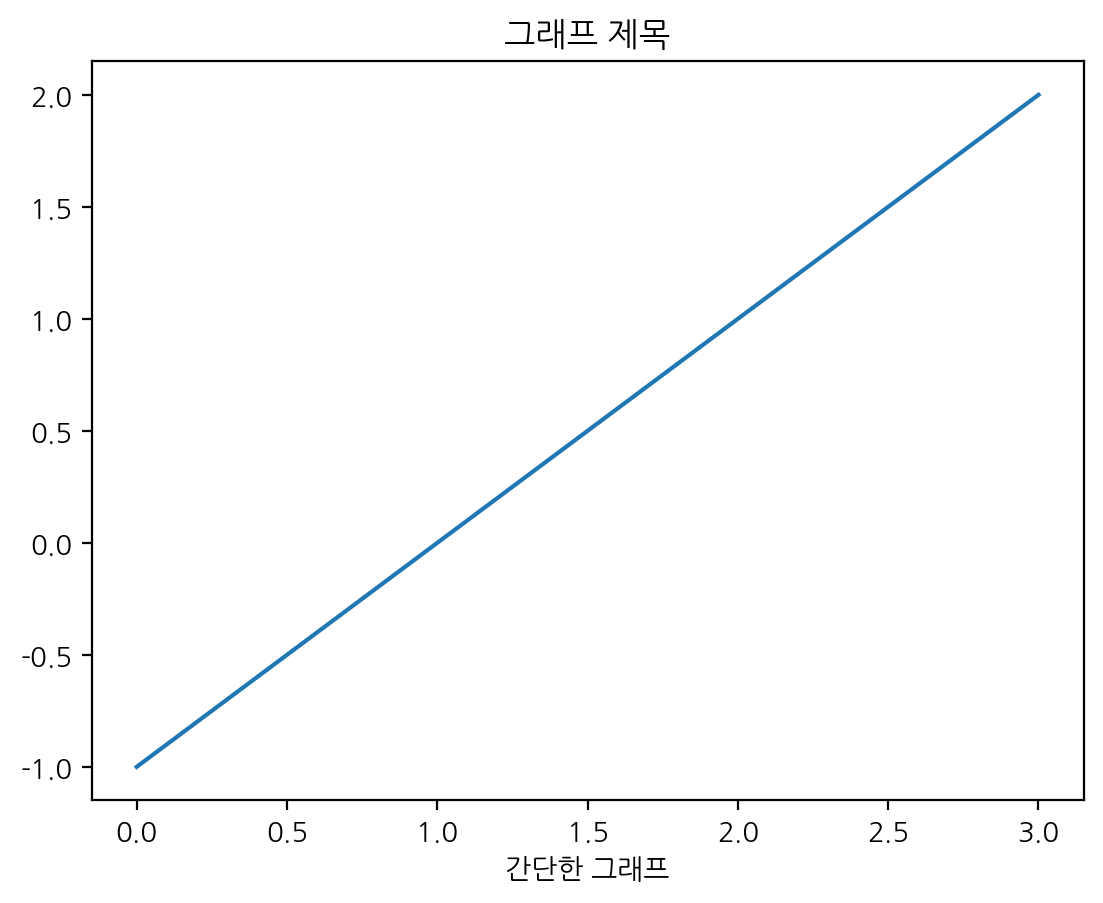

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-1, 0, 1, 2])
plt.title('그래프 제목')
plt.xlabel('간단한 그래프')
plt.show()

In [ ]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 5.69 MiB/s, done.


In [ ]:
exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [ ]:
exam.agg("mean")

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [ ]:
exam.agg(['mean', 'max','min', 'median'])

,id,nclass,math,english,science
mean,10.5,3.0,57.45,84.9,59.45
max,20.0,5.0,90.00,98.0,98.00
min,1.0,1.0,20.00,56.0,12.00
median,10.5,3.0,54.00,86.5,62.50


In [ ]:
exam.mean()

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [ ]:
exam.agg(mean_math = ('math', 'mean'))

,math
mean_math,57.45


In [ ]:
df = pd.DataFrame([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9],
               [np.nan, np.nan, 10]],
               columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [ ]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'])

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [ ]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis = 0)

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [ ]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis = 'index')

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [ ]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis = 1)

,sum,mean,median,min,max,count
0,6.0,2.0,2.0,1.0,3.0,3.0
1,15.0,5.0,5.0,4.0,6.0,3.0
2,24.0,8.0,8.0,7.0,9.0,3.0
3,10.0,10.0,10.0,10.0,10.0,1.0


In [ ]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis = 'columns')

,sum,mean,median,min,max,count
0,6.0,2.0,2.0,1.0,3.0,3.0
1,15.0,5.0,5.0,4.0,6.0,3.0
2,24.0,8.0,8.0,7.0,9.0,3.0
3,10.0,10.0,10.0,10.0,10.0,1.0


### 집단별 요약 통계량 구하기

In [ ]:
exam.tail(5)

,id,nclass,math,english,science
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [ ]:
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass').agg(math_max = ('math', 'max'))

,math_max
nclass,
1,60
2,90
3,65
4,75
5,89


In [ ]:
exam.groupby('nclass').mean()

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [ ]:
exam.groupby('nclass').min()

,id,math,english,science
nclass,,,,
1,1,30,86,50
2,5,25,78,25
3,9,20,65,15
4,13,46,56,12
5,17,65,68,58


In [ ]:
exam.groupby('nclass').max()

,id,math,english,science
nclass,,,,
1,4,60,98,78
2,8,90,90,98
3,12,65,98,65
4,16,75,98,78
5,20,89,83,98


In [ ]:
exam.groupby('nclass').mean()[["math"]]

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass').mean()[['math', 'english', 'science']]

,math,english,science
nclass,,,
1,46.25,94.75,61.50
2,61.25,84.25,58.25
3,45.00,86.50,39.25
4,56.75,84.75,55.00
5,78.00,74.25,83.25


In [ ]:
exam.groupby('nclass').agg('mean')

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [ ]:
exam.groupby('nclass').agg(['mean', 'median'])

id          math        english        science       
        mean median   mean median    mean median    mean median
nclass                                                         
1        2.5    2.5  46.25   47.5   94.75   97.5   61.50   59.0
2        6.5    6.5  61.25   65.0   84.25   84.5   58.25   55.0
3       10.5   10.5  45.00   47.5   86.50   91.5   39.25   38.5
4       14.5   14.5  56.75   53.0   84.75   92.5   55.00   65.0
5       18.5   18.5  78.00   79.0   74.25   73.0   83.25   88.5

In [ ]:
# 인자 사용 방법 : 열 이름은 키워드인 반면, 값 ('열명', '함수명')은 열에서 값을 계산하는 데 사용되는 함수 이름
# 새_열이름 = ('열명', '함수명')
exam.groupby('nclass').agg(meanMath = ('math', 'mean'))

,meanMath
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
#인자 사용 방법 사전 형석
# {'열명' : '함수명'}
exam.groupby('nclass').agg({'math' : 'mean'})

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
# dict of axis labels -> functions, function names or list of such,
# {'열명': ['함수명1', '함수명2', ,,,]}
exam.groupby('nclass').agg({'math' : ['mean', 'min', 'max']})

math        
         mean min max
nclass               
1       46.25  30  60
2       61.25  25  90
3       45.00  20  65
4       56.75  46  75
5       78.00  65  89

## (알아두명 좋아요) 변수를 인덱스로 바꾸지 않기

In [ ]:
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass', as_index=False).agg(mean_math = ('math', 'mean'))

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


## DataFrameGroupBy 객체

In [ ]:
exam.groupby('nclass')

In [ ]:
type(exam.groupby('nclass'))

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
range(10)

range(0, 10)

In [ ]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
exam_gb = exam.groupby('nclass')
exam_gb

In [ ]:
list(exam_gb)

[(1,
     id  nclass  math  english  science
  0   1       1    50       98       50
  1   2       1    60       97       60
  2   3       1    45       86       78
  3   4       1    30       98       58),
 (2,
     id  nclass  math  english  science
  4   5       2    25       80       65
  5   6       2    50       89       98
  6   7       2    80       90       45
  7   8       2    90       78       25),
 (3,
      id  nclass  math  english  science
  8    9       3    20       98       15
  9   10       3    50       98       45
  10  11       3    65       65       65
  11  12       3    45       85       32),
 (4,
      id  nclass  math  english  science
  12  13       4    46       98       65
  13  14       4    48       87       12
  14  15       4    75       56       78
  15  16       4    58       98       65),
 (5,
      id  nclass  math  english  science
  16  17       5    65       68       98
  17  18       5    80       78       90
  18  19       5    89       68   

In [ ]:
exam_gb_df = exam.groupby(['nclass'])
exam_gb_df

In [ ]:
list(exam_gb_df)

<ipython-input-49-b5282684d2f3>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  list(exam_gb_df)


[(1,
     id  nclass  math  english  science
  0   1       1    50       98       50
  1   2       1    60       97       60
  2   3       1    45       86       78
  3   4       1    30       98       58),
 (2,
     id  nclass  math  english  science
  4   5       2    25       80       65
  5   6       2    50       89       98
  6   7       2    80       90       45
  7   8       2    90       78       25),
 (3,
      id  nclass  math  english  science
  8    9       3    20       98       15
  9   10       3    50       98       45
  10  11       3    65       65       65
  11  12       3    45       85       32),
 (4,
      id  nclass  math  english  science
  12  13       4    46       98       65
  13  14       4    48       87       12
  14  15       4    75       56       78
  15  16       4    58       98       65),
 (5,
      id  nclass  math  english  science
  16  17       5    65       68       98
  17  18       5    80       78       90
  18  19       5    89       68   

In [ ]:
for key, value in exam_gb:
  print(key, '\n' )
  print(type(value))
  print(value, '\n', '-'*40, '\n')

1 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
0   1       1    50       98       50
1   2       1    60       97       60
2   3       1    45       86       78
3   4       1    30       98       58 
 ---------------------------------------- 

2 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
4   5       2    25       80       65
5   6       2    50       89       98
6   7       2    80       90       45
7   8       2    90       78       25 
 ---------------------------------------- 

3 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
8    9       3    20       98       15
9   10       3    50       98       45
10  11       3    65       65       65
11  12       3    45       85       32 
 ---------------------------------------- 

4 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
12  13       4    46       98       65
13  14       4    48       87       12
14  1

## 여러 요약 통계량 한 번에 구하기

In [ ]:
# nclass 별로 분리
# 수학 점수 평균
# 수학 점수 합계
# 수학 점수 중앙 값
# 빈도 (학생 수)

In [ ]:
exam.groupby('nclass').agg(mean_math   = ('math', 'mean'),
         sum_math    = ('math', 'sum'),
         median_math = ('math', 'median'),
         n           = ('nclass', 'count'))

,mean_math,sum_math,median_math,n
nclass,,,,
1,46.25,185,47.5,4
2,61.25,245,65.0,4
3,45.00,180,47.5,4
4,56.75,227,53.0,4
5,78.00,312,79.0,4


## (알아두면 좋아요) 모든 변수의 요약 통계량 한 번에 구하기

In [ ]:
exam.groupby('nclass').mean()

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [ ]:
exam.groupby('nclass').agg(['mean', 'median'])

id          math        english        science       
        mean median   mean median    mean median    mean median
nclass                                                         
1        2.5    2.5  46.25   47.5   94.75   97.5   61.50   59.0
2        6.5    6.5  61.25   65.0   84.25   84.5   58.25   55.0
3       10.5   10.5  45.00   47.5   86.50   91.5   39.25   38.5
4       14.5   14.5  56.75   53.0   84.75   92.5   55.00   65.0
5       18.5   18.5  78.00   79.0   74.25   73.0   83.25   88.5

In [ ]:
exam.groupby('nclass')[["math", "english", "science"]].agg(['mean', 'median'])

math        english        science       
         mean median    mean median    mean median
nclass                                            
1       46.25   47.5   94.75   97.5   61.50   59.0
2       61.25   65.0   84.25   84.5   58.25   55.0
3       45.00   47.5   86.50   91.5   39.25   38.5
4       56.75   53.0   84.75   92.5   55.00   65.0
5       78.00   79.0   74.25   73.0   83.25   88.5

In [ ]:
exam.groupby('nclass').agg(['mean', 'median'])[["math", "english", "science"]]

math        english        science       
         mean median    mean median    mean median
nclass                                            
1       46.25   47.5   94.75   97.5   61.50   59.0
2       61.25   65.0   84.25   84.5   58.25   55.0
3       45.00   47.5   86.50   91.5   39.25   38.5
4       56.75   53.0   84.75   92.5   55.00   65.0
5       78.00   79.0   74.25   73.0   83.25   88.5

In [ ]:
exam.groupby('nclass')['id'].count() # Series

nclass
1    4
2    4
3    4
4    4
5    4
Name: id, dtype: int64

In [ ]:
exam.groupby('nclass')[['id']].count()

,id
nclass,
1,4
2,4
3,4
4,4
5,4


In [ ]:
exam.groupby('nclass').count()

,id,math,english,science
nclass,,,,
1,4,4,4,4
2,4,4,4,4
3,4,4,4,4
4,4,4,4,4
5,4,4,4,4


In [ ]:
exam.groupby('nclass').count()[['id']]

,id
nclass,
1,4
2,4
3,4
4,4
5,4


## 집단별로 다시 집단 나누기

In [ ]:
import pandas as pd

mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [ ]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'category'],
      dtype='object')

In [ ]:
mpg.sample()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
85,ford,f150 pickup 4wd,4.6,1999,8,manual(m5),4,13,16,r,pickup


In [ ]:
mpg.sample(frac=.02)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
138,mercury,mountaineer 4wd,4.0,2008,6,auto(l5),4,13,19,r,suv
82,ford,explorer 4wd,5.0,1999,8,auto(l4),4,13,17,r,suv
26,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
199,toyota,land cruiser wagon 4wd,5.7,2008,8,auto(s6),4,13,18,r,suv
204,toyota,toyota tacoma 4wd,3.4,1999,6,auto(l4),4,15,19,r,pickup


In [ ]:
# 제조 회사 및 구동 방식별 분리
# cty 평균 구하기
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean')) #시험예상

mean_cty
manufacturer drv          
audi         4       16.82
             f       18.86
chevrolet    4       12.50
             f       18.80
             r       14.10
dodge        4       12.00
             f       15.82
ford         4       13.31
             r       14.75
honda        f       24.44
hyundai      f       18.64
jeep         4       13.50
land rover   4       11.50
lincoln      r       11.33
mercury      4       13.25
nissan       4       13.75
             f       20.00
pontiac      f       17.00
subaru       4       19.29
toyota       4       14.93
             f       21.37
volkswagen   f       20.93

In [ ]:
# 제조 회사 및 차종별 분리
# cty 평균 구하기
# hwy 평균 구하기
mpg.groupby(['manufacturer', 'category']).agg(mean_cty = ('cty', 'mean'), mean_hwy = ('hwy', 'mean'))

mean_cty  mean_hwy
manufacturer category                      
audi         compact        17.93     26.93
             midsize        16.00     24.00
chevrolet    2seater        15.40     24.80
             midsize        18.80     27.60
             suv            12.67     17.11
dodge        minivan        15.82     22.36
             pickup         12.05     16.11
             suv            11.86     16.00
ford         pickup         13.00     16.43
             subcompact     15.89     23.22
             suv            12.89     17.78
honda        subcompact     24.44     32.56
hyundai      midsize        19.00     27.71
             subcompact     18.29     26.00
jeep         suv            13.50     17.62
land rover   suv            11.50     16.50
lincoln      suv            11.33     17.00
mercury      suv            13.25     18.00
nissan       compact        20.00     28.00
             midsize        20.00     27.43
             suv            13.75     18.00
pontiac      midsize        17.00     26.40
subaru       compact        19.75     26.00
             subcompact     19.50     26.00
             suv            18.83     25.00
toyota       compact        22.25     30.58
             midsize        19.86     28.29
             pickup         15.57     19.43
             suv            14.38     18.25
volkswagen   compact        20.79     28.50
             midsize        18.57     27.57
             subcompact     24.00     32.83

In [ ]:
|# audi의 drv별 빈도

# audi 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "audi"').groupby(['drv']).agg(n = ('drv', 'count'))

,n
drv,
4,11
f,7


In [ ]:
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).count()

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,category
drv,,,,,,,,,,
4,4,4,4,4,4,4,4,4,4,4
f,5,5,5,5,5,5,5,5,5,5
r,10,10,10,10,10,10,10,10,10,10


In [ ]:
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).count()[['model']].rename(columns = {'model' : 'n'})

,n
drv,
4,4
f,5
r,10


In [ ]:
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).count()[['model']]

,model
drv,
4,4
f,5
r,10


## (알아 두면 좋아요) value_counts()로 집단별 빈도 간단하게 구하기

In [ ]:
mpg.groupby('drv').agg(n = ('drv', 'count'))

,n
drv,
4,103
f,106
r,25


In [ ]:
mpg[['drv', 'cyl']].value_counts()

drv  cyl
f    4      58
4    8      48
f    6      43
4    6      32
     4      23
r    8      21
f    5       4
r    6       4
f    8       1
dtype: int64

In [ ]:
mpg[['drv', 'cyl']].value_counts().to_frame()

0
drv cyl    
f   4    58
4   8    48
f   6    43
4   6    32
    4    23
r   8    21
f   5     4
r   6     4
f   8     1

In [ ]:
mpg['drv'].value_counts().query('n > 100') # 오류 발생

AttributeError: 'Series' object has no attribute 'query'

In [ ]:
mpg['drv'].value_counts().to_frame().query('drv > 100')

,drv
f,106
4,103


In [ ]:
# drv 빈도 구하기
# 데이터 프레임으로 바꾸기, 변수명 n으로 바꾸기
# axis 이름에 drv 지정
# n이 100을 초과한 경우 추출
mpg['drv'].value_counts().to_frame('n').rename_axis('drv').query('n > 100')

,n
drv,
f,106
4,103


In [95]:
# SUV 추출
# 합산 연비 변수 만들기
# 제조 회사 별로 분리
# 합산 연비 평균 구하기
# 내림차순 정렬
# 1 ~ 5위까지 출력, 시험예상

mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False)

,mean_tot
manufacturer,
subaru,21.92
toyota,16.31
nissan,15.88
mercury,15.62
jeep,15.56
ford,15.33
chevrolet,14.89
lincoln,14.17
land rover,14.00


# 데이터 합치기

In [96]:
# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id' : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

test2 = pd.DataFrame({'id' : [1, 2, 3, 4, 5],
                      'final' : [70, 83, 65, 95, 80]})

In [97]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [98]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [99]:
pd.merge(test1, test2)

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [100]:
pd.merge(test1, test2, on = 'id')

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [101]:
pd.merge(test1, test2, on='id', how='inner')

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [102]:
test1.merge(test2, on='id', how='inner')

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [103]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [104]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


## 다른 데이터를 활용해 변수 추가하기

In [106]:
name = pd.DataFrame({'nclass' : [1, 2, 3, 4, 5],
                     'teacher' : ['kim', 'lee', 'park', 'choi', 'jung']})

In [107]:
name

,nclass,teacher
0,1,kim
1,2,lee
2,3,park
3,4,choi
4,5,jung


In [108]:
exam.sample(5)

,id,nclass,math,english,science
6,7,2,80,90,45
18,19,5,89,68,87
5,6,2,50,89,98
8,9,3,20,98,15
16,17,5,65,68,98


In [109]:
pd.merge(name, exam)

,nclass,teacher,id,math,english,science
0,1,kim,1,50,98,50
1,1,kim,2,60,97,60
2,1,kim,3,45,86,78
3,1,kim,4,30,98,58
4,2,lee,5,25,80,65
5,2,lee,6,50,89,98
6,2,lee,7,80,90,45
7,2,lee,8,90,78,25
8,3,park,9,20,98,15
9,3,park,10,50,98,45


In [110]:
pd.merge(exam, name, on='nclass', how='inner')

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


### 세로로 합치기 : concat()

In [111]:
# 학생 1-5번 시험 데이터 만들기
group_a = pd.DataFrame({'id' : [1, 2, 3, 4, 5],
                        'test' : [60, 80, 70, 90, 85]})

# 학생 6-10번 시험 데이터 만들기
group_b = pd.DataFrame({'id' : [6, 7, 8, 9, 10],
                        'test' : [70, 83, 65, 95, 80]})

In [112]:
group_a

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [113]:
group_b

,id,test
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [116]:
pd.concat([group_a, group_b])

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [117]:
pd.concat([group_a, group_b]).reset_index() # 원 index가 열로 이동, 새로운 시퀀스 지정

,index,id,test
0,0,1,60
1,1,2,80
2,2,3,70
3,3,4,90
4,4,5,85
5,0,6,70
6,1,7,83
7,2,8,65
8,3,9,95
9,4,10,80


In [118]:
pd.concat([group_a, group_b]).reset_index(drop=True) # 원 index가 열로 이동, 새로운 시퀀스 지정

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


## merge() 시험예상

In [120]:
df1 = pd.DataFrame([[1, 'apple'], [2, 'banana']],
                   columns = ['id', 'fruits'])
df1

,id,fruits
0,1,apple
1,2,banana


In [122]:
df2 = pd.DataFrame([[1, 3000], [5, 500]],
                   columns = ['id', 'price'])
df2

,id,price
0,1,3000
1,5,500


In [123]:
pd.merge(df1, df2)

,id,fruits,price
0,1,apple,3000


In [124]:
pd.merge(df1, df2, how = 'inner')

,id,fruits,price
0,1,apple,3000


In [125]:
df1.merge(df2)

,id,fruits,price
0,1,apple,3000


In [126]:
df1.merge(df2, how='left')

,id,fruits,price
0,1,apple,3000.0
1,2,banana,NaN


In [128]:
df2

,id,price
0,1,3000
1,5,500


In [127]:
df1.merge(df2, how='right')

,id,fruits,price
0,1,apple,3000
1,5,NaN,500


In [129]:
df1.merge(df2, how='outer')

,id,fruits,price
0,1,apple,3000.0
1,2,banana,NaN
2,5,NaN,500.0


In [131]:
df1.merge(df2, how='cross')

,id_x,fruits,id_y,price
0,1,apple,1,3000
1,1,apple,5,500
2,2,banana,1,3000
3,2,banana,5,500


### 가로로 합치기 merge(): 행의 선택은?

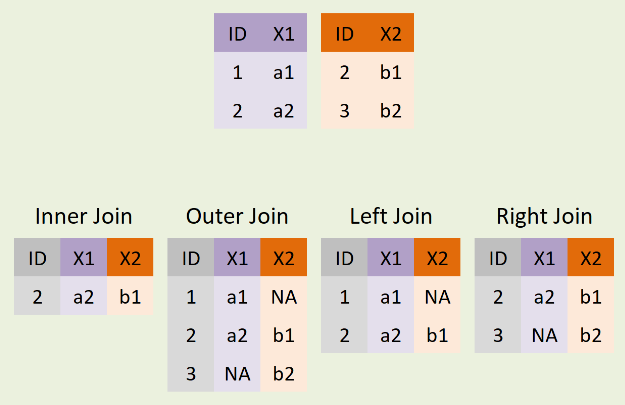

## 정리하기

In [132]:
# 추가한 변수를 pandas 코드에 바로 활용하기
exam.assign(total = exam['math'] + exam['english'] + exam['science']).sort_values('total').head()

## 6. 집단별로 요약하기
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

# 각 집단별로 다시 집단 나누기
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean'))

## 7. 데이터 합치기
pd.merge(test1, test2, how = 'left', on = 'id')  # 가로로 합치기
pd.concat([group_a, group_b])                    # 세로로 합치기

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80
